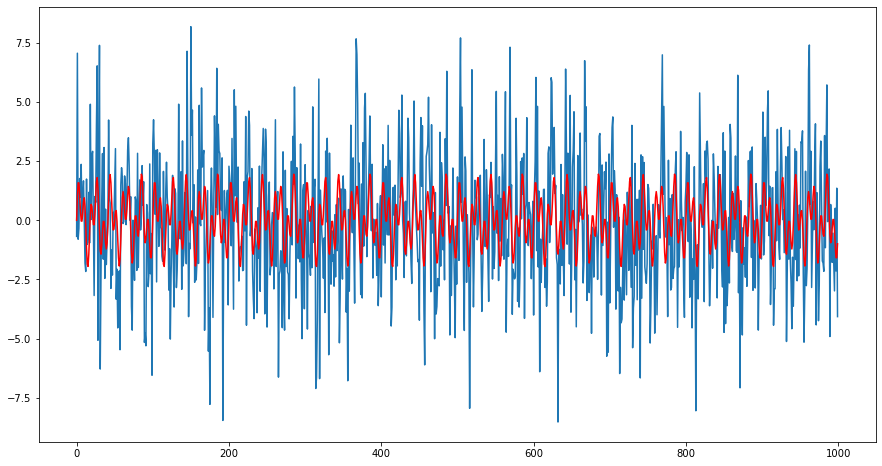

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#The algorithm : 1 - Find the FFT Of the signal
#2- Filter out the small fourier coeff to a determined threshold
#3- Find the inverse FFT of the filtered frequency components


#create signals
t=np.arange(0,1,0.001)
f=np.sin(2*np.pi* 50*t) + np.sin(2*np.pi*120*t)
f_clean=f
f=f+ 2.5*np.random.randn(len(t))
plt.figure(figsize=(15,8))
plt.plot(f)
plt.plot(f_clean , color='r')

<IPython.core.display.Javascript object>


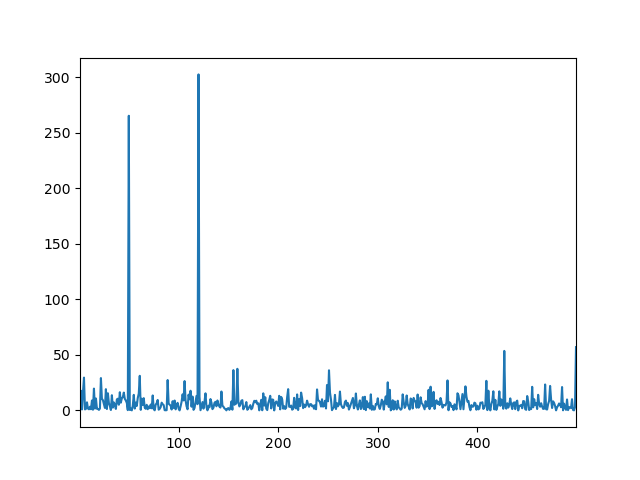

C:\Users\antoz\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [13]:
n=len(t)
fhat=np.fft.fft(f , n)
PSD=fhat * np.conj(fhat) / n
freq=(1/(0.001*n)) * np.arange(n)
L=np.arange(1,np.floor(n/2) , dtype='int')
plt.plot(freq[L] , PSD[L])
plt.xlim(freq[L[0]] , freq[L[-1]])
plt.show()

In [15]:
indicies=PSD>100
PSDclean=PSD*indicies
fhat=indicies*fhat
ffilt=np.fft.ifft(fhat)

<IPython.core.display.Javascript object>


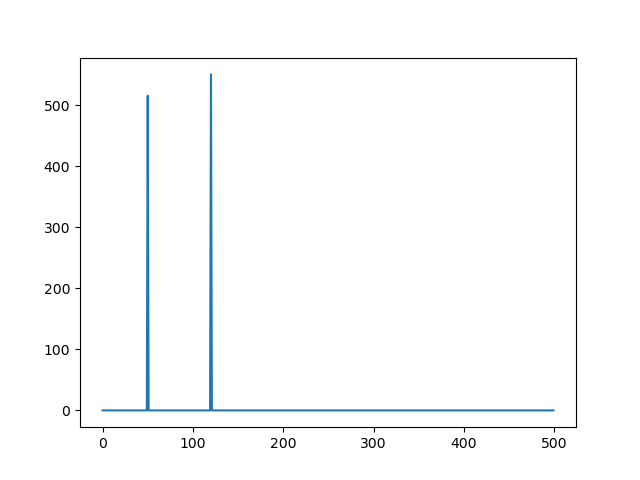

In [20]:
x=int(len(np.absolute(fhat)) / 2)
plt.plot(np.absolute(fhat)[0:x])

<IPython.core.display.Javascript object>


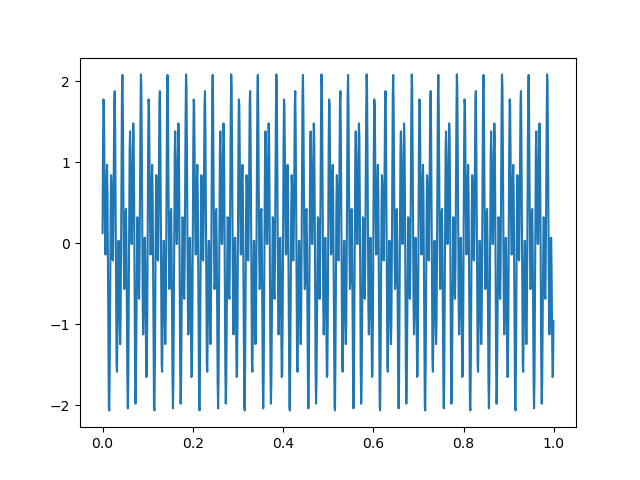

C:\Users\antoz\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [25]:
plt.plot(t, ffilt)

<IPython.core.display.Javascript object>


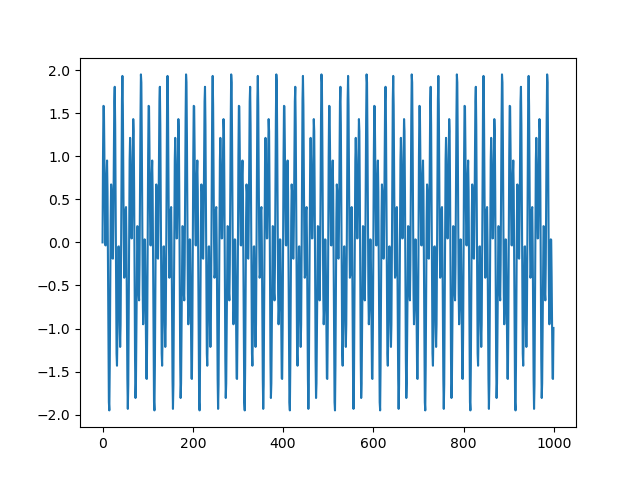

In [26]:
plt.plot(f_clean)